
.. redirect-from:: /tutorials/colors/colorbar_only

# Customized Colorbars Tutorial

This tutorial shows how to build and customize standalone colorbars, i.e.
without an attached plot.

A `~.Figure.colorbar` needs a "mappable" (`matplotlib.cm.ScalarMappable`)
object (typically, an image) which indicates the colormap and the norm to be
used.  In order to create a colorbar without an attached image, one can instead
use a `.ScalarMappable` with no associated data.


In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl

## Basic continuous colorbar
Here, we create a basic continuous colorbar with ticks and labels.

The arguments to the `~.Figure.colorbar` call are the `.ScalarMappable`
(constructed using the *norm* and *cmap* arguments), the axes where the
colorbar should be drawn, and the colorbar's orientation.

For more information see the `~matplotlib.colorbar` API.



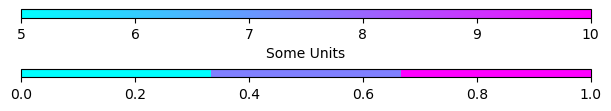

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 1), layout='constrained')

cmap = mpl.colormaps['cool']
norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=axs[0], orientation='horizontal', label='Some Units')

cmap2 = cmap.resampled(3)
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap2), cax=axs[1],
             orientation='horizontal')

## Colorbar attached next to a pre-existing axes
All examples in this tutorial (except this one) show a standalone colorbar on
its own figure, but it is possible to display the colorbar *next* to a
pre-existing Axes *ax* by passing ``ax=ax`` to the colorbar() call (meaning
"draw the colorbar next to *ax*") rather than ``cax=ax`` (meaning "draw the
colorbar on *ax*").



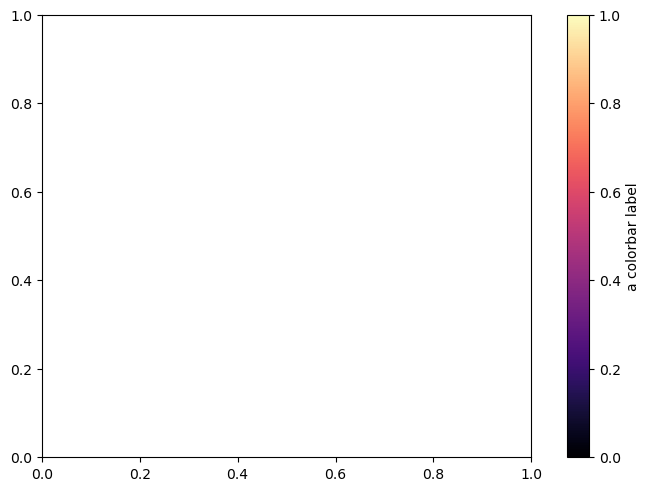

In [35]:
fig, ax = plt.subplots(layout='constrained')

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 1), cmap='magma'),
             ax=ax, orientation='vertical', label='a colorbar label')

## Discrete and extended colorbar with continuous colorscale
The following example shows how to make a discrete colorbar based on a
continuous cmap.  We use `matplotlib.colors.BoundaryNorm` to describe the
interval boundaries (which must be in increasing order), and further pass the
*extend* argument to it to further display "over" and "under" colors (which
are used for data outside of the norm range).



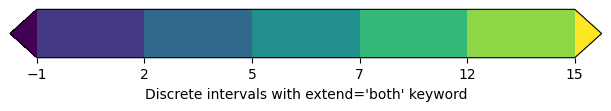

In [36]:
fig, ax = plt.subplots(figsize=(6, 1), layout='constrained')

cmap = mpl.cm.viridis
bounds = [-1, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

## Colorbar with arbitrary colors
The following example still uses a `.BoundaryNorm` to describe discrete
interval boundaries, but now uses a `matplotlib.colors.ListedColormap` to
associate each interval with an arbitrary color (there must be as many
intervals than there are colors).  The "over" and "under" colors are set on
the colormap using `.Colormap.with_extremes`.

We also pass additional arguments to `~.Figure.colorbar`:

- To display the out-of-range values on the colorbar, we use the *extend*
  argument in the colorbar() call.  (This is equivalent to passing the
  *extend* argument in the `.BoundaryNorm` constructor as done in the
  previous example.)
- To make the length of each colorbar segment proportional to its
  corresponding interval, we use the *spacing* argument in the colorbar()
  call.



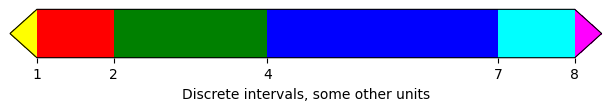

In [37]:
fig, ax = plt.subplots(figsize=(6, 1), layout='constrained')

cmap = (mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])
        .with_extremes(under='yellow', over='magenta'))
bounds = [1, 2, 4, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax, orientation='horizontal',
    extend='both',
    spacing='proportional',
    label='Discrete intervals, some other units',
)

## Colorbar with custom extension lengths
We can customize the length colorbar extensions, on a colorbar with discrete
intervals. To make the length of each extension the
same as the length of the interior colors, use ``extendfrac='auto'``.



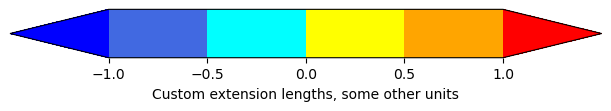

In [38]:
fig, ax = plt.subplots(figsize=(6, 1), layout='constrained')

cmap = (mpl.colors.ListedColormap(['royalblue', 'cyan', 'yellow', 'orange'])
        .with_extremes(over='red', under='blue'))
bounds = [-1.0, -0.5, 0.0, 0.5, 1.0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax, orientation='horizontal',
    extend='both', extendfrac='auto',
    spacing='uniform',
    label='Custom extension lengths, some other units',
)

plt.show()

# Colorbar example [Source](https://matplotlib.org/stable/gallery/color/colorbar_basics.html)

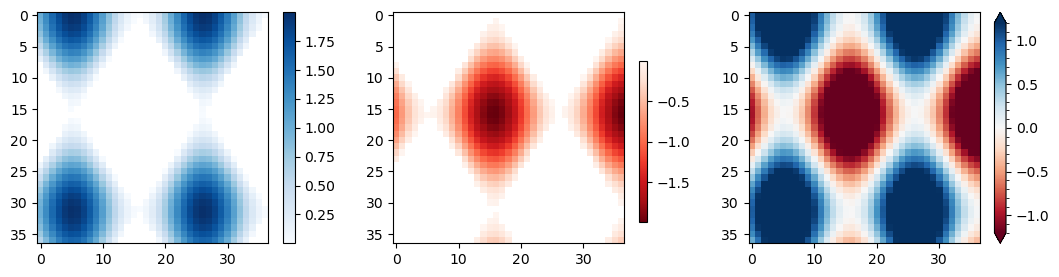

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# setup some generic data
N = 37
x, y = np.mgrid[:N, :N]
Z = (np.cos(x*0.2) + np.sin(y*0.3))

# mask out the negative and positive values, respectively
Zpos = np.ma.masked_less(Z, 0)
Zneg = np.ma.masked_greater(Z, 0)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos = ax1.imshow(Zpos, cmap='Blues', interpolation='none')

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which Axes object it should be near
fig.colorbar(pos, ax=ax1)

# repeat everything above for the negative data
# you can specify location, anchor and shrink the colorbar
neg = ax2.imshow(Zneg, cmap='Reds_r', interpolation='none')
fig.colorbar(neg, ax=ax2, location='right', anchor=(0, 0.3), shrink=0.7)

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = ax3.imshow(Z, cmap='RdBu', vmin=-1.2, vmax=1.2,
                             interpolation='none')
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar.minorticks_on()
plt.show()

In [8]:
np.mgrid[:3, 3:5, :3]

array([[[[0, 0, 0],
         [0, 0, 0]],

        [[1, 1, 1],
         [1, 1, 1]],

        [[2, 2, 2],
         [2, 2, 2]]],


       [[[3, 3, 3],
         [4, 4, 4]],

        [[3, 3, 3],
         [4, 4, 4]],

        [[3, 3, 3],
         [4, 4, 4]]],


       [[[0, 1, 2],
         [0, 1, 2]],

        [[0, 1, 2],
         [0, 1, 2]],

        [[0, 1, 2],
         [0, 1, 2]]]])